In [39]:
import os
from dotenv import load_dotenv
from langchain_community.vectorstores import FAISS
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_ollama.embeddings import OllamaEmbeddings
from langchain_groq import ChatGroq
from langchain_ollama.chat_models import ChatOllama
from langchain_community.document_loaders import WebBaseLoader
from langchain_huggingface import HuggingFaceEmbeddings
from langchain_huggingface.embeddings import HuggingFaceEmbeddings
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnablePassthrough
from langchain_core.output_parsers import StrOutputParser
from langchain.tools.retriever import create_retriever_tool
load_dotenv()


True

In [18]:
llm = ChatGroq(model="qwen-qwq-32b")
#embeddings = OllamaEmbeddings(model="llama3")
embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2")
#llm.invoke("what is capital of india")

/Users/m0k08nh/projects/preparing/test/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
loader = WebBaseLoader(["https://langchain-ai.github.io/langgraph/"])
docs = loader.load()
docs[::2]

[Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/', 'title': 'LangGraph', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='\n\n\n\n\n\n\n\n\n\n\nLangGraph\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n          Skip to content\n        \n\n\n\n\n\n\n\nJoin us at  Interrupt: The Agent AI Conference by LangChain on May 13 & 14 in San Francisco!\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            LangGraph\n          \n\n\n\n            \n              LangGraph\n            \n          \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            Initializing search\n          \n\n\n\n\n\n\n\n\n\n\n\n\n    GitHub\n  \n\n\n\n\n\n\n\n\n\n\n          \n  \n    \n  \n  LangGraph\n\n        \n\n\n\n          \n  \n    \n  \n  Agents\n\n        \n\n\n\n          \n  \n    \n  \n  API reference\n\n        \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n    LangGraph\n  \n\n\n\n\n\n\n    GitHub\n  \n\n\

In [14]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=2000,chunk_overlap=200)
documents = text_splitter.split_documents(documents=docs)
documents[::2]

[Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/', 'title': 'LangGraph', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='LangGraph\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n          Skip to content\n        \n\n\n\n\n\n\n\nJoin us at  Interrupt: The Agent AI Conference by LangChain on May 13 & 14 in San Francisco!\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            LangGraph\n          \n\n\n\n            \n              LangGraph\n            \n          \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            Initializing search\n          \n\n\n\n\n\n\n\n\n\n\n\n\n    GitHub\n  \n\n\n\n\n\n\n\n\n\n\n          \n  \n    \n  \n  LangGraph\n\n        \n\n\n\n          \n  \n    \n  \n  Agents\n\n        \n\n\n\n          \n  \n    \n  \n  API reference\n\n        \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n    LangGraph\n  \n\n\n\n\n\n\n    GitHub\n  \n\n\n\n\n\n\n\n\n    \n  \

In [19]:
vector_db = FAISS.from_documents(documents=documents,embedding=embeddings)
vector_db.similarity_search("what is langgraph")

[Document(id='3cb54bcf-1cda-4c85-8d4a-1a10060ec7b6', metadata={'source': 'https://langchain-ai.github.io/langgraph/', 'title': 'LangGraph', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='LangGraph\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n          Skip to content\n        \n\n\n\n\n\n\n\nJoin us at  Interrupt: The Agent AI Conference by LangChain on May 13 & 14 in San Francisco!\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            LangGraph\n          \n\n\n\n            \n              LangGraph\n            \n          \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            Initializing search\n          \n\n\n\n\n\n\n\n\n\n\n\n\n    GitHub\n  \n\n\n\n\n\n\n\n\n\n\n          \n  \n    \n  \n  LangGraph\n\n        \n\n\n\n          \n  \n    \n  \n  Agents\n\n        \n\n\n\n          \n  \n    \n  \n  API reference\n\n        \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n    LangGraph\n  \n\n\n\n\n\n

In [22]:
prompt = ChatPromptTemplate.from_template("""
                                    Answer from provided context
                                          <context>
                                          {context}
                                          </context>

                                          Question : {input}
                                          
                                          """)

prompt

ChatPromptTemplate(input_variables=['context', 'input'], input_types={}, partial_variables={}, messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'input'], input_types={}, partial_variables={}, template='\n                                    Answer from provided context\n                                          <context>\n                                          {context}\n                                          </context>\n\n                                          Question : {input}\n\n                                          '), additional_kwargs={})])

In [23]:
retriever = vector_db.as_retriever()

In [38]:
retriever.invoke("what is langgraph")

[Document(id='3cb54bcf-1cda-4c85-8d4a-1a10060ec7b6', metadata={'source': 'https://langchain-ai.github.io/langgraph/', 'title': 'LangGraph', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='LangGraph\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n          Skip to content\n        \n\n\n\n\n\n\n\nJoin us at  Interrupt: The Agent AI Conference by LangChain on May 13 & 14 in San Francisco!\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            LangGraph\n          \n\n\n\n            \n              LangGraph\n            \n          \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            Initializing search\n          \n\n\n\n\n\n\n\n\n\n\n\n\n    GitHub\n  \n\n\n\n\n\n\n\n\n\n\n          \n  \n    \n  \n  LangGraph\n\n        \n\n\n\n          \n  \n    \n  \n  Agents\n\n        \n\n\n\n          \n  \n    \n  \n  API reference\n\n        \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n    LangGraph\n  \n\n\n\n\n\n

In [35]:
chains = (
    {
        "context":retriever,
        "input" : RunnablePassthrough()
    }
    | prompt
    | llm
    | StrOutputParser()
)

In [37]:
response = chains.invoke("what is the langgraph")
response

'\n<think>\nOkay, so the user is asking "what is the langgraph". I need to look through the provided context to find the answer. Let me start by scanning through each of the document snippets given.\n\nThe first document mentions LangGraph\'s purpose: "Build reliable, stateful AI systems, without giving up control". That\'s a key point. The title and description from the metadata also repeat this. \n\nLooking at the second document, there\'s a section titled "Why use LangGraph?" which lists reasons like reliability, controllability with moderation and human approval, low-level extensibility, and streaming support. It also mentions companies using it, which could be part of the answer but maybe not essential for a basic definition.\n\nThe third document talks about LangGraph\'s ecosystem and pairing with LangChain products, but maybe that\'s more about integrations. The fourth document includes an "Acknowledgements" section, which might not be relevant here.\n\nThe last document (ID 30f

In [41]:
langraph_tool = create_retriever_tool(retriever=retriever,name="langraph",description="search about langgraph")

In [42]:
tools = [langraph_tool]

In [43]:
from typing import Annotated,Sequence
from typing_extensions import TypedDict
from langchain_core.messages import BaseMessage
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages

In [69]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [70]:
graph_builder = StateGraph(State)

In [71]:
def chatbot(state:State):
    return {"messages":llm.invoke(state['messages'])}

In [72]:
graph_builder.add_node("chatbot",chatbot)

In [73]:
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)

In [74]:
graph = graph_builder.compile()


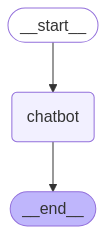

In [75]:
from IPython.display import Image, display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [76]:
while True:
  user_input=input("User: ")
  if user_input.lower() in ["quit","q"]:
    print("Good Bye")
    break
  for event in graph.stream({'messages':("user",user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages'])
      print("Assistant:",value["messages"].content)

dict_values([{'messages': AIMessage(content='\n<think>\nOkay, the user is asking for the capital of India. Let me recall. I know that India\'s capital isn\'t Mumbai, which is a common misconception because Mumbai is the financial capital. But the actual capital moved from Calcutta to a new city. Was it Delhi? Wait, New Delhi is part of Delhi, the national capital territory. So the capital is New Delhi. Let me confirm. Yes, New Delhi is the capital, established in 1911 as the British Raj\'s capital, and it remained after independence in 1947. So the answer should be New Delhi. I should also mention a bit of history to provide context.\n</think>\n\nThe capital of India is **New Delhi**. It serves as the administrative and political center of the country and is part of the larger National Capital Territory (NCT) of Delhi. \n\n### Key Points:\n- **Established**: New Delhi was founded in 1911 by the British Raj as the capital of India, replacing Kolkata (Calcutta), which had been the capita